## Lesson 3.2 Practice: Analyzing CAS Tables

### Documentation:
- [SAS Viya Actions and Action Sets by Name and Product](https://go.documentation.sas.com/doc/en/pgmsascdc/v_018/allprodsactions/titlepage.htm)
- [SAS Scripting Wrapper for Analytics Transfer (SWAT)](https://sassoftware.github.io/python-swat/index.html)

1. Import packages and connect to the CAS server.

In [31]:
## Import packages
import swat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Set options
pd.set_option('display.max_columns', None)

## Connect to CAS
conn = swat.CAS('server.demo.sas.com', 30571, 'student', 'Metadata0', name = 'py03p01')

2. Load the **appRatings** file from the **Casuser** caslib into memory in the **Casuser** caslib. Confirm that the table was loaded successfully.

**Hint**: Use the [fileInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/v_017/caspg/cas-table-fileinfo.htm?homeOnFail) action to find the file name and extension.

#### Click the three dots below to reveal the solution.

In [2]:
## View available data source files
fi = conn.fileInfo(caslib = 'PIVY')
display(fi)

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,,,loans_raw.sashdat,5186578544,NONE,2021-12-17T18:40:14+00:00,1.955386e+09
1,-rwxr-xr-x,,,heart.sashdat,1009056,NONE,2021-12-17T18:43:57+00:00,1.955386e+09
2,-rwxr-xr-x,,,customers_raw.csv,641416208,,2021-12-17T18:42:51+00:00,1.955386e+09
3,-rwxr-xr-x,,,cars.txt,35573,,2021-12-17T18:43:57+00:00,1.955386e+09
4,-rwxr-xr-x,,,cars.sas7bdat,139264,,2021-12-17T18:43:57+00:00,1.955386e+09
5,-rwxr-xr-x,,,appRatings.sashdat,1796132096,NONE,2021-12-17T18:43:54+00:00,1.955386e+09


**Hint**: Use the [loadTable](https://go.documentation.sas.com/doc/en/pgmsascdc/v_017/caspg/cas-table-loadtable.htm?homeOnFail) action to load the table into memory.

In [32]:
## Load the appRatings.sashdat file into memory
lt = conn.loadTable(path = 'appRatings.sashdat', caslib = 'PIVY',
                    casOut = {'caslib':'casuser','replace' : True})
display(lt)

## View available in-memory tables
ti = conn.tableInfo(caslib = 'casuser')
display(ti)

NOTE: Cloud Analytic Services made the file appRatings.sashdat available as table APPRATINGS in caslib CASUSER(student).


[caslib]

 'CASUSER(student)'

[tableName]

 'APPRATINGS'

[casTable]

 CASTable('APPRATINGS', caslib='CASUSER(student)')

+ Elapsed: 0.0186s, user: 0.00464s, sys: 0.0137s, mem: 2.21mb

,Name,Label,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,APPRATINGS,,17600048,7,0,utf-8,2022-03-11T16:37:56+00:00,2022-03-11T16:37:56+00:00,2022-03-11T16:37:56+00:00,UTF8,1.962636e+09,1.962636e+09,1.962636e+09,0,0,0,0,appRatings.sashdat,PIVY,0,student,,2021-12-17T18:43:54+00:00,1.955386e+09
1,CARS,2004 Car Data,428,15,0,utf-8,2022-03-07T15:31:50+00:00,2022-03-07T15:31:50+00:00,2022-03-11T16:19:58+00:00,UTF8,1.962286e+09,1.962286e+09,1.962635e+09,1,0,0,0,cars.sas7bdat,PIVY,0,student,,2021-12-17T18:43:57+00:00,1.955386e+09
2,LOANS_RAW,,16311047,20,0,utf-8,2022-03-07T21:21:10+00:00,2022-03-07T21:21:13+00:00,2022-03-11T16:18:17+00:00,UTF8,1.962307e+09,1.962307e+09,1.962635e+09,1,0,0,0,loans_raw.sashdat,PIVY,0,student,,2021-12-17T18:40:14+00:00,1.955386e+09


3. Reference the **APPRATINGS** CAS table in the variable **tbl**. Then preview five rows. Confirm that the following columns exists: **RatingID**, **Product**, **os**, **Version**, **Server**, **Date**, and **Rating**.

In [34]:
## Reference the CAS table
tbl = conn.CASTable('appratings', caslib = 'casuser')

## Pandas API
head = tbl.head()
display(head)

## CAS action
fetch = tbl.fetch(to=5)
display(fetch)

,RatingID,Product,os,Version,Server,Date,Rating
0,077564493987-P-A-V.A2021.1-NAW,Payment,Android,V.A2021.1,NAW,2021-02-28,4.0
1,579253088916-T-A-V.A2021.3-NAE,Transfer,Android,V.A2021.3,NAE,2021-08-16,4.0
2,756753635127-O-A-V.A2020.1-EME,Other,Android,V.A2020.1,EMEA,2020-01-25,5.0
3,256544075208-D-A-V.A2016.4-NAE,Deposit,Android,V.A2016.4,NAE,2016-11-10,4.0
4,833339879987-D-A-V.A2020.3-NAW,Deposit,Android,V.A2020.3,NAW,2020-09-22,4.0


,RatingID,Product,os,Version,Server,Date,Rating
0,077564493987-P-A-V.A2021.1-NAW,Payment,Android,V.A2021.1,NAW,2021-02-28,4.0
1,579253088916-T-A-V.A2021.3-NAE,Transfer,Android,V.A2021.3,NAE,2021-08-16,4.0
2,756753635127-O-A-V.A2020.1-EME,Other,Android,V.A2020.1,EMEA,2020-01-25,5.0
3,256544075208-D-A-V.A2016.4-NAE,Deposit,Android,V.A2016.4,NAE,2016-11-10,4.0
4,833339879987-D-A-V.A2020.3-NAW,Deposit,Android,V.A2020.3,NAW,2020-09-22,4.0


4. View the column attributes of the **APPRATINGS** table using the [columnInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/v_017/caspg/cas-table-columninfo.htm) action. Is there a format applied to any columns?

In [5]:
## Answer: Format is applied on the Date column
tbl.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,RatingID,,1,varchar,30,30,,0,0
1,Product,,2,char,8,8,,0,0
2,os,,3,char,7,7,,0,0
3,Version,,4,char,10,10,,0,0
4,Server,,5,char,4,4,,0,0
5,Date,,6,double,8,9,DATE,9,0
6,Rating,,7,double,8,12,,0,0


5. How many rows are in the **APPRATINGS** table? Use the action or method of your choice.

In [7]:
## Answer: 17600048

## Pandas API
s = tbl.shape
display(s)

## CAS action
nr = tbl.numrows()
display(nr)

(17600048, 7)

[numrows]

 17600048

+ Elapsed: 0.000525s, user: 0.000143s, sys: 0.00031s, mem: 0.402mb

6. View the number of distinct and missing values of the **APPRATINGS** table using the [distinct](https://go.documentation.sas.com/doc/en/pgmsascdc/v_017/casanpg/cas-simple-distinct.htm?homeOnFail) action. How many distinct values are in the **os** column? Do any columns contain missing values?

In [8]:
## Answer: 2 distinct values in the os column. No missing values in any columns
tbl.distinct()

,Column,NDistinct,NMiss,Trunc
0,RatingID,17599966.0,0.0,0.0
1,Product,5.0,0.0,0.0
2,os,2.0,0.0,0.0
3,Version,80.0,0.0,0.0
4,Server,4.0,0.0,0.0
5,Date,3652.0,0.0,0.0
6,Rating,5.0,0.0,0.0


7. What are the two distinct values of the **os** column? What is the count of each value? Use the action or method of your choice.

In [9]:
## Answer: Andriod and IOS

## Pandas API
vc = (tbl
      .os
      .value_counts())
display(vc)

## CAS action
f = tbl.freq(inputs = 'os')
display(f)

Android    11441292
IOS         6158756
dtype: int64

,Column,CharVar,FmtVar,Level,Frequency
0,os,Android,Android,1,11441292.0
1,os,IOS,IOS,2,6158756.0


8. What is the mean rating for each value in the **os** column? Use the groupby method or the groupBy parameter method.

In [11]:
## Answer: Android - 4.377916, IOS - 4.020230

## Pandas API with mean method
df = (tbl
      .groupby('os')
      .Rating
      .mean())
display(df)


## CAS action with mean method
tbl.groupBy = 'os'
df = (tbl
      .Rating
      .mean())
display(df)


## CAS action with summary action
df = (tbl
      .summary(inputs = 'Rating', 
               subSet = ['MEAN'])
      .concat_bygroups()['Summary'])
display(df)

# Remove parameters from the tbl CASTable object
tbl.del_params('groupby')

os
Android    4.377916
IOS        4.020230
Name: Rating, dtype: float64

os
Android    4.377916
IOS        4.020230
Name: Rating, dtype: float64

,Column,Mean
os,,
Android,Rating,4.377916
IOS,Rating,4.020230


9. Terminate the connection to the CAS server if you are not completing the challenge below.

In [12]:
conn.terminate()

### Challenge (optional)
Find the mean ratings for each value of **os** by **Year**. Create a line plot to visualize the results. View the final **DataFrame** and plot below to view the desired results.

,Year,os,Column,Mean
0,2013,Android,Rating,4.056421
13,2014,Android,Rating,3.731722
15,2015,Android,Rating,3.467705
17,2016,Android,Rating,4.132868
19,2017,Android,Rating,4.090878
2,2018,Android,Rating,4.179546
4,2019,Android,Rating,4.325270
6,2020,Android,Rating,4.479278
8,2021,Android,Rating,4.502509
10,2022,Android,Rating,4.515090


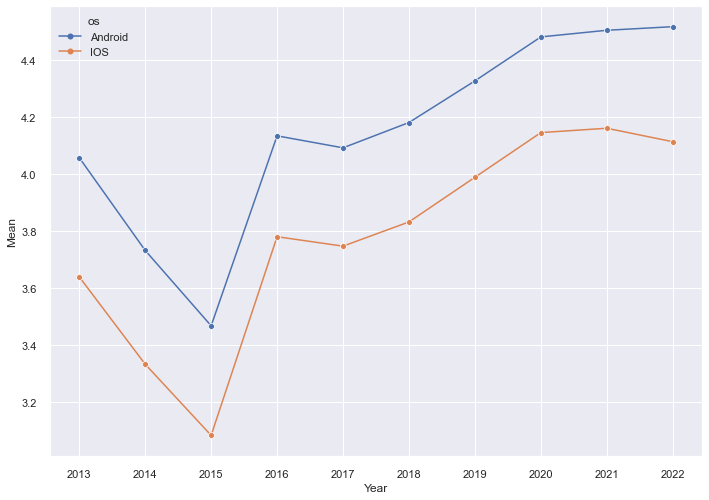

In [35]:
## Calculate the Year of each Date
tbl.computedVarsProgram = 'Year = year(date)'

## Group by Year and os for the analysis
tbl.groupBy = ['Year', 'os']

## Analyze the data and use traditional Pandas functionality to prepare the DataFrame
df = (tbl
      .summary(inputs = 'Rating', subSet = 'MEAN')  ## Use the summary action obtain the mean values for ratings by each Year and os
      .concat_bygroups()['Summary']                 ## Concatenate the DataFrames from the action, and return the DataFrame from the CASResults object
      .reset_index()                                ## Reset the index so year is a column
      .sort_values(['os','Year'])                   ## Sort the values by os and Year in the DataFrame
)
display(df)


## Visualize the DataFrame using seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data = df, x = 'Year', y = 'Mean', 
             hue = 'os',
             markers = ['o','o'], 
             style = 'os',
             dashes = False);


## Terminate the CAS session
conn.terminate()